# Machine Learning Engineer Nanodegree
## Capstone Project
Elissa Backas
August 15, 2017


Colun
* CASEID  "Case identification number" #id number to correlate with the other survey
* PREGORDR   "Pregnancy order (number)"
* PREGEND1    "BC-1 How Pregnancy Ended - 1st mention"
* WKSGEST     "Gestational length of completed pregnancy (in weeks)"
* BPA_BDSCHECK1     "Whether 1st liveborn baby from this pregnancy was BPA or BDS" #drop babies who died or were given away for adoption
* BABYSEX1     "BD-2 Sex of 1st Liveborn Baby from This Pregnancy"
* CMBABDOB     "CM for baby's or babies' date of birth (delivery date)"
* HPAGELB     "BD-6 Father's age at time of child(ren) s birth"
* PRIORSMK     "BE-3 Amount R smoked in 6 mos before R knew she was pregnant" #I'd like to use this, but not enough data
* NPOSTSMK     "BE-5 Amount R smoked during pregnancy after R knew she was preg" #I'd like to use this, but not enough data
* GETPRENA     "BE-6 Any prenatal care for this pregnancy" #I'd like to use this, but not enough data
* CMKIDIED,2,3   "CM for child's date of death - 1st from this pregnancy" #only multiples died, will remove those rows from the data
* OUTCOM_S     "Outcome of pregnancy (based on corrected/chron sorted data)"
* NBRNLV_S     "# of babies born alive from this preg (based on CCSD)" #drop women with NaN for this
* COHPBEG     "EG-18a Was R living w/father of preg at beginning of preg"
* COHPEND     "EG-18b Was R living w/father of preg when preg ended/baby was born"
* BIRTHORD     "Birth order"
* AGEPREG     "Age at pregnancy outcome"
* DATECON     "CM date of conception"
* AGECON     "Age at time of conception"
* FMAROUT5     "Formal marital status at pregnancy outcome"
* PMARPREG     "Whether pregnancy ended before R's 1st marriage (premaritally)"
* RMAROUT6     "Informal marital status at pregnancy outcome - 6 categories"
* FMARCON5     "Formal marital status at conception - 5 categories"
* RMARCON6     "Informal marital status at conception - 6 categories"
* PAYDELIV     "Payment for delivery"
* LBW1     "Low birthweight - 1st baby from this preg"
* **BFEEDWKS     "Duration of breastfeeding in weeks" #trying to predict this**
* EDUCAT     "Education (completed years of schooling)"
* HIEDUC     "Highest completed year of school or degree"
* RACE     "Race"
* HISPANIC     "Hispanic origin"
* HISPRACE     "Race & Hispanic origin of respondent - 1977 OMB standards (respondent recode)"
* HISPRACE2     "Race & Hispanic origin of respondent - 1997 OMB standards (respondent recode)"
* RCURPREG     "Pregnant at time of interview"
* PREGNUM     "CAPI-based total number of pregnancies"
* PARITY     "Total number of live births"
* CURR_INS     "Current health insurance coverage"
* PUBASSIS     "Whether R received public assistance in prior calendar year"
* POVERTY    "Poverty level income"
* LABORFOR     "Labor force status"
* RELIGION     "Current religious affiliation"
* METRO     "Place of residence (Metropolitan / Nonmetropolitan)"
* BRNOUT     "IB-8 R born outside of US"
* YRSTRUS     "Year R came to the United States" #not enough data


In [1]:
import pandas as pd
import thinkstats2
import numpy as np

def ReadFemPreg(dct_file='2013_2015_FemPregSetup.dct',
                dat_file='2013_2015_FemPregData.dat'):
    #thinkstats converter 
    #https://github.com/boydjj/think_stats
    dct = thinkstats2.ReadStataDct(dct_file)
    #https://www.safaribooksonline.com/library/view/think-stats-2nd/9781491907344/ch01.html
    df = pd.read_fwf(dat_file, colspecs=dct.colspecs, names=dct.names, header=None)
    return df

In [2]:
myfile = ReadFemPreg()
myfile

,CASEID,PREGORDR,HOWPREG_N,HOWPREG_P,MOSCURRP,NOWPRGDK,PREGEND1,PREGEND2,HOWENDDK,NBRNALIV,...,SECU,SEST,CMINTVW,CMLSTYR,CMJAN3YR,CMJAN4YR,CMJAN5YR,QUARTER,PHASE,INTVWYEAR
0,60418,1,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,4,342,1381,1369,1345,1333,1321,14,1,2015
1,60418,2,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,4,342,1381,1369,1345,1333,1321,14,1,2015
2,60418,3,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,4,342,1381,1369,1345,1333,1321,14,1,2015
3,60419,1,33.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,...,3,318,1388,1376,1345,1333,1321,16,1,2015
4,60420,1,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,1,339,1388,1376,1345,1333,1321,16,1,2015
5,60420,2,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1,339,1388,1376,1345,1333,1321,16,1,2015
6,60423,1,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,2,355,1387,1375,1345,1333,1321,16,1,2015
7,60423,2,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,2,355,1387,1375,1345,1333,1321,16,1,2015
8,60426,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,3,344,1368,1356,1321,1309,1297,9,1,2013
9,60426,2,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,3,344,1368,1356,1321,1309,1297,9,1,2013


In [3]:
#drop women still breastfeeding
myfile = myfile[myfile.BFEEDWKS != 994]
#drop women with no breastfeeding data
myfile = myfile[myfile.BFEEDWKS.notnull()]
#if never breastfed, set number of weeks equal to 0
myfile.loc[myfile['BFEEDWKS'] == 995, 'BFEEDWKS'] = 0
#drop if no babies born
myfile = myfile.dropna(subset=['NBRNLV_S'])
#drop if pregnancy ended in miscarriage, stilbirth or abortion
myfile = myfile[myfile.PREGEND1 >= 5]
#drop if baby died or given away for adoption
myfile = myfile[myfile.BPA_BDSCHECK1 == 0]
#fill "not ascertained, refused, don't know answers with mean
myfile.loc[myfile['CMBABDOB'] >= 9997, 'CMBABDOB'] = myfile.CMBABDOB.mean()
myfile.loc[myfile['HPAGELB'] >= 98, 'HPAGELB'] = myfile.HPAGELB.mean()

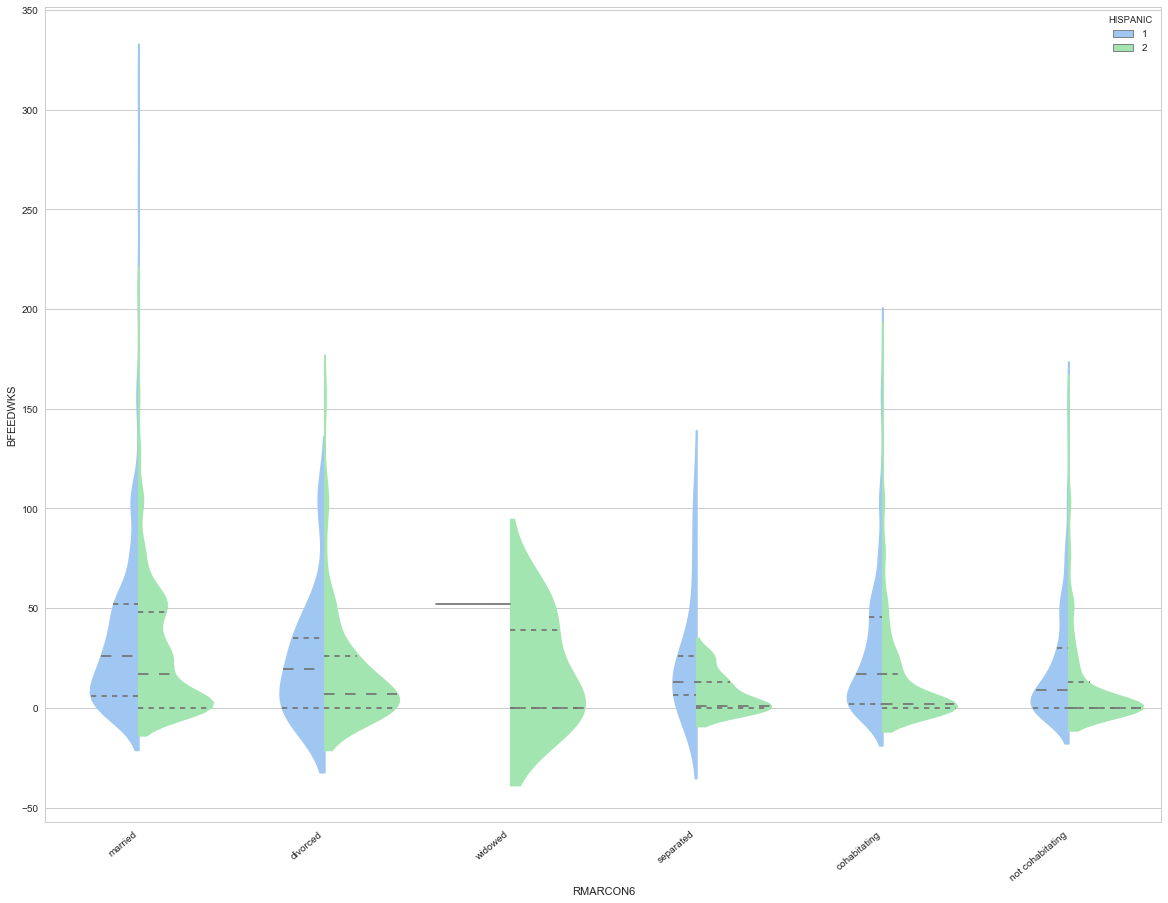

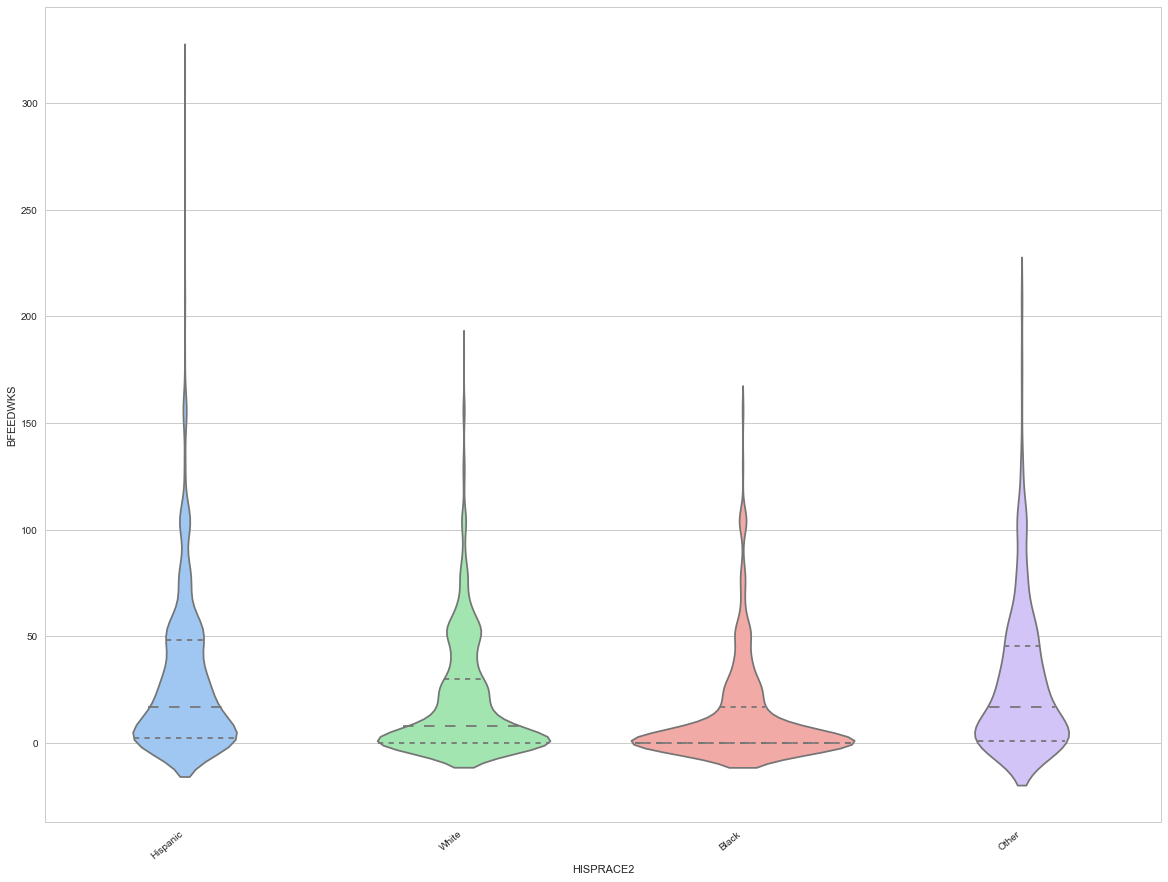

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,15))
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Draw a violinplot comparing marital status and number of weeks a woman breastfed
mypplot = sns.violinplot(x="RMARCON6", y="BFEEDWKS", data=myfile, split=True, hue="HISPANIC",
              inner="quart")
mypplot.set_xticklabels(['married', 'divorced', 'widowed', 'separated', 'cohabitating', 'not cohabitating'], rotation=40, ha="right")
plt.show()
plt.figure(figsize=(20,15))
mypplot = sns.violinplot(x="HISPRACE2", y="BFEEDWKS", data=myfile, split=True,
              inner="quart")
mypplot.set_xticklabels(['Hispanic', 'White', 'Black', 'Other'], rotation=40, ha="right")
plt.show()

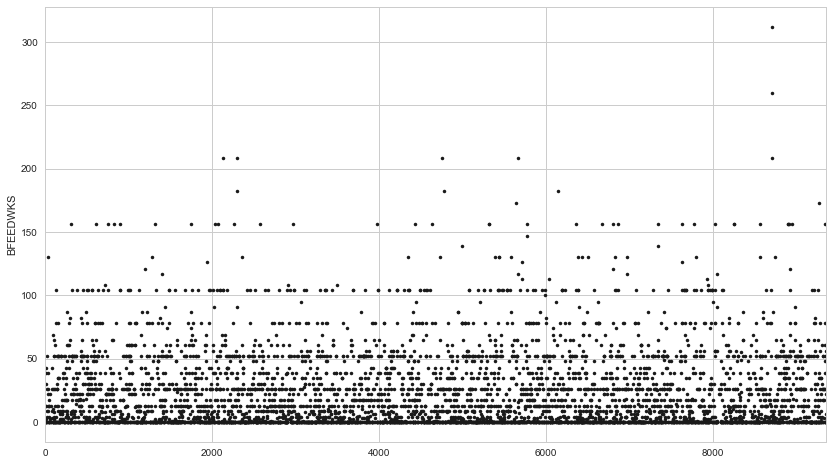

In [11]:
%matplotlib inline
myfile['BFEEDWKS'].plot(style='k.', figsize = (14,8))
plt.ylabel('BFEEDWKS')
plt.show()
#sns.distplot(myfile.BFEEDWKS)

In [12]:
df = pd.DataFrame(myfile, columns=['PREGORDR', 'PREGEND1', 'WKSGEST', 'BABYSEX1', 'CMBABDOB',  'HPAGELB', 'COHPBEG', 'COHPEND', 'BIRTHORD', 'AGEPREG', 'DATECON', 'AGECON', 'PMARPREG', 'RMAROUT6', 'RMARCON6', 'PAYDELIV', 'LBW1', 'BFEEDWKS', 'EDUCAT', 'HISPRACE2', 'PREGNUM', 'PARITY', 'CURR_INS', 'PUBASSIS', 'POVERTY', 'LABORFOR', 'RELIGION', 'METRO', 'BRNOUT'])
#inspect the features to make sure there's enough data for each and nothing looks "off"
for feature in df.keys():
    print df[feature].value_counts(dropna=False)
    print df[feature].describe()

1     1963
2     1565
3      968
4      501
5      233
6      104
7       54
8       24
9       11
10       6
11       4
12       2
20       1
Name: PREGORDR, dtype: int64
count    5436.000000
mean        2.319169
std         1.493761
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        20.000000
Name: PREGORDR, dtype: float64
6.0    3882
5.0    1554
Name: PREGEND1, dtype: int64
count    5436.000000
mean        5.714128
std         0.451870
min         5.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         6.000000
Name: PREGEND1, dtype: float64
39.0    1978
40.0    1125
38.0     656
37.0     368
41.0     356
36.0     251
42.0     183
35.0     183
32.0      79
34.0      55
43.0      47
30.0      43
28.0      22
33.0      21
26.0      14
29.0      13
27.0      12
31.0       8
24.0       6
44.0       6
25.0       3
45.0       3
46.0       2
23.0       1
48.0       1
Name: WKSGEST, dtype: int64
count    5436.000000
mea

In [13]:
from sklearn.preprocessing import MinMaxScaler

continuous = ['PREGORDR','WKSGEST', 'CMBABDOB', 'HPAGELB', 'BIRTHORD', 'AGEPREG', 
              'DATECON', 'AGECON','BFEEDWKS','EDUCAT','PREGNUM','PARITY','POVERTY']
discrete = ['PREGEND1', 'BABYSEX1', 'COHPBEG', 'COHPEND', 'PMARPREG',
            'RMAROUT6', 'RMARCON6', 'PAYDELIV', 'LBW1',
            'HISPRACE2','CURR_INS','PUBASSIS','LABORFOR',
           'RELIGION','METRO','BRNOUT']
df[continuous] = df[continuous].apply(lambda x: np.log(x + 1))
scaler = MinMaxScaler(feature_range=(0, 1))
#scale continuous features
df[continuous] = scaler.fit_transform(df[continuous])
#one hot encode discrete features
df = pd.get_dummies(df, columns=discrete)
for feature in df.keys():
    print df[feature].value_counts(dropna=False)
    print df[feature].describe()
#drop the column we're trying to predict
labels = df['BFEEDWKS']
#df = df.drop('BFEEDWKS', axis = 1)

0.000000    1963
0.172437    1565
0.294784     968
0.389683     501
0.467221     233
0.532779     104
0.589567      54
0.639659      24
0.684467      11
0.725000       6
0.762005       4
0.796046       2
1.000000       1
Name: PREGORDR, dtype: int64
count    5436.000000
mean        0.180174
std         0.167306
min         0.000000
25%         0.000000
50%         0.172437
75%         0.294784
max         1.000000
Name: PREGORDR, dtype: float64
0.715676    1978
0.750271    1125
0.680205     656
0.643813     368
0.784032     356
0.606451     251
0.568064     183
0.816999     183
0.446160      79
0.528596      55
0.849207      47
0.358567      43
0.265132      22
0.487984      21
0.165016      14
0.312628      13
0.215968      12
0.403048       8
0.057192       6
0.880692       6
0.112141       3
0.911485       3
0.941616       2
0.000000       1
1.000000       1
Name: WKSGEST, dtype: int64
count    5436.000000
mean        0.696671
std         0.092969
min         0.000000
25%         0.

In [14]:
#apply PCA and produce visualization
from sklearn.decomposition import PCA
import matplotlib.cm as cm
pca = PCA(n_components=15)
pca.fit(df)

def pca_results(good_data, pca):
    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions
    print(variance_ratios)

    
    return pd.DataFrame(pca.components_, columns=good_data.columns, index=dimensions)

# Generate PCA results
pca_results = pca_results(df, pca)
features = df.drop('BFEEDWKS', axis = 1)
#reduced_data = pca.transform(df)

              Explained Variance
Dimension 1               0.1794
Dimension 2               0.0973
Dimension 3               0.0798
Dimension 4               0.0619
Dimension 5               0.0571
Dimension 6               0.0463
Dimension 7               0.0438
Dimension 8               0.0370
Dimension 9               0.0335
Dimension 10              0.0282
Dimension 11              0.0264
Dimension 12              0.0245
Dimension 13              0.0229
Dimension 14              0.0215
Dimension 15              0.0200


In [15]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'breastfeeding' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.1, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 4892 samples.
Testing set has 544 samples.


C:\conda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

reg = DecisionTreeRegressor(random_state=3)
reg.fit(X_train, y_train)
predictions_test = reg.predict(X_test)
predictions_train = reg.predict(X_train[:300])
print('DecisionTreeRegressor r^2 train score {:.4f}'.format(r2_score(y_train[:300], predictions_train)))
print('DecisionTreeRegressor r^2 test score {:.4f}'.format(r2_score(y_test, predictions_test)))

reg = RandomForestRegressor(random_state=3)
reg.fit(X_train, y_train)
predictions_test = reg.predict(X_test)
predictions_train = reg.predict(X_train[:300])
print('RandomFoestRegressor r^2 train score {:.4f}'.format(r2_score(y_train[:300], predictions_train)))
print('RandomFoestRegressor r^2 test score {:.4f}'.format(r2_score(y_test, predictions_test)))

reg = MLPRegressor(random_state=3)
reg.fit(X_train, y_train)
predictions_test = reg.predict(X_test)
predictions_train = reg.predict(X_train[:300])
print('MLPRegressor r^2 train score {:.4f}'.format(r2_score(y_train[:300], predictions_train)))
print('MLPRegressor r^2 test score {:.4f}'.format(r2_score(y_test, predictions_test)))

DecisionTreeRegressor r^2 train score 1.0000
DecisionTreeRegressor r^2 test score -0.2486
RandomFoestRegressor r^2 train score 0.8690
RandomFoestRegressor r^2 test score 0.3261
MLPRegressor r^2 train score 0.5709
MLPRegressor r^2 test score 0.2287


In [69]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

#Initialize the classifier with parameters I already tuned
reg2 = RandomForestRegressor(random_state=3, n_estimators=300, min_samples_split=5, min_samples_leaf=7)

#this was the last one I played with
parameters = {'max_leaf_nodes':(100,500,600)}

scorer = make_scorer(r2_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(estimator = reg2, param_grid = parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_reg= grid_fit.best_estimator_
print(grid_fit.best_params_ )

# Make predictions using the unoptimized and model
predictions = (reg2.fit(X_train, y_train)).predict(X_test)
best_predictions = best_reg.predict(X_test)

print "Unoptimized model\n------"
print "r^2 score on testing data: {:.4f}".format(r2_score(y_test, predictions))
print "\nOptimized Model\n------"
print "Final r^2 score on the testing data: {:.4f}".format(r2_score(y_test, best_predictions))


{'max_leaf_nodes': 500}
Unoptimized model
------
r^2 score on testing data: 0.3620

Optimized Model
------
Final r^2 score on the testing data: 0.3621


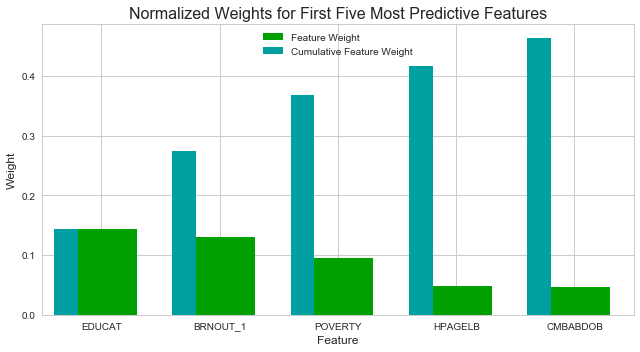

[array(['EDUCAT', 'BRNOUT_1', 'POVERTY', 'HPAGELB', 'CMBABDOB', 'DATECON',
       'AGECON', 'AGEPREG', 'WKSGEST', 'PREGNUM', 'HISPRACE2_3', 'PARITY',
       'METRO_3', 'LABORFOR_1', 'PREGORDR', 'RELIGION_3', 'HISPRACE2_1',
       'RMAROUT6_1.0', 'PMARPREG_2.0', 'HISPRACE2_2'], dtype=object)]


In [75]:
import visuals as vs
importances = best_reg.feature_importances_
vs.feature_plot(importances, X_train, y_train)
X_train_reduced = [X_train.columns.values[(np.argsort(importances)[::-1])[:20]]]
print(X_train_reduced)

In [78]:
# Import functionality for cloning a model
from sklearn.base import clone


# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:20]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:20]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_reg)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)
print "reduced r^2 score on the testing data: {:.4f}".format(r2_score(y_test, reduced_predictions))

reduced r^2 score on the testing data: 0.3402


In [79]:

pca_results_reduced = pd.DataFrame(pca_results, columns = ['EDUCAT', 'POVERTY', 'BRNOUT_1', 'HPAGELB', 'DATECON', 'WKSGEST',
       'AGECON', 'CMBABDOB', 'AGEPREG', 'PREGNUM', 'PARITY', 'PREGORDR',
       'HISPRACE2_3', 'METRO_3', 'LABORFOR_1', 'RELIGION_3', 'HISPRACE2_1',
       'RMAROUT6_1.0', 'PMARPREG_2.0', 'HISPRACE2_2', 'BFEEDWKS'])
myfile_reduced = pd.DataFrame(df, columns = ['EDUCAT', 'POVERTY', 'BRNOUT_1', 'HPAGELB', 'DATECON', 'WKSGEST',
       'AGECON', 'CMBABDOB', 'AGEPREG', 'PREGNUM', 'PARITY', 'PREGORDR',
       'HISPRACE2_3', 'METRO_3', 'LABORFOR_1','RELIGION_3', 'HISPRACE2_1',
       'RMAROUT6_1.0', 'PMARPREG_2.0', 'HISPRACE2_2', 'BFEEDWKS'])
print (pca_results_reduced)

                EDUCAT   POVERTY  BRNOUT_1   HPAGELB   DATECON   WKSGEST  \
Dimension 1   0.099328  0.103438  0.034557  0.037015 -0.001161  0.005538   
Dimension 2  -0.071248 -0.026831  0.191673  0.010306  0.005232  0.003973   
Dimension 3  -0.089120 -0.068830  0.329551  0.000475 -0.001658 -0.003069   
Dimension 4   0.063360  0.106124  0.151508 -0.003854 -0.048784  0.011879   
Dimension 5  -0.007254 -0.007215  0.010668  0.001099  0.002848 -0.005239   
Dimension 6   0.007906  0.011148  0.049166  0.019865  0.055302 -0.013006   
Dimension 7   0.032185  0.007191 -0.015218  0.015574  0.018332 -0.013858   
Dimension 8   0.015674  0.032977 -0.140396 -0.005319  0.055475  0.011237   
Dimension 9  -0.036116  0.007713  0.072252  0.005372 -0.037320 -0.001485   
Dimension 10 -0.097491 -0.031309 -0.060385 -0.054894 -0.214224 -0.006633   
Dimension 11  0.047787 -0.017865 -0.037609  0.004480 -0.133356 -0.015257   
Dimension 12  0.082089  0.019194 -0.145285  0.016848  0.100745  0.013677   
Dimension 13

In [80]:
pca_results_reduced.loc['Dimension 1']

EDUCAT          0.099328
POVERTY         0.103438
BRNOUT_1        0.034557
HPAGELB         0.037015
DATECON        -0.001161
WKSGEST         0.005538
AGECON          0.074025
CMBABDOB       -0.001003
AGEPREG         0.074416
PREGNUM        -0.009537
PARITY         -0.011104
PREGORDR        0.009227
HISPRACE2_3    -0.113157
METRO_3        -0.027771
LABORFOR_1      0.059926
RELIGION_3     -0.043434
HISPRACE2_1    -0.041101
RMAROUT6_1.0    0.354351
PMARPREG_2.0    0.351804
HISPRACE2_2     0.129940
BFEEDWKS        0.070945
Name: Dimension 1, dtype: float64

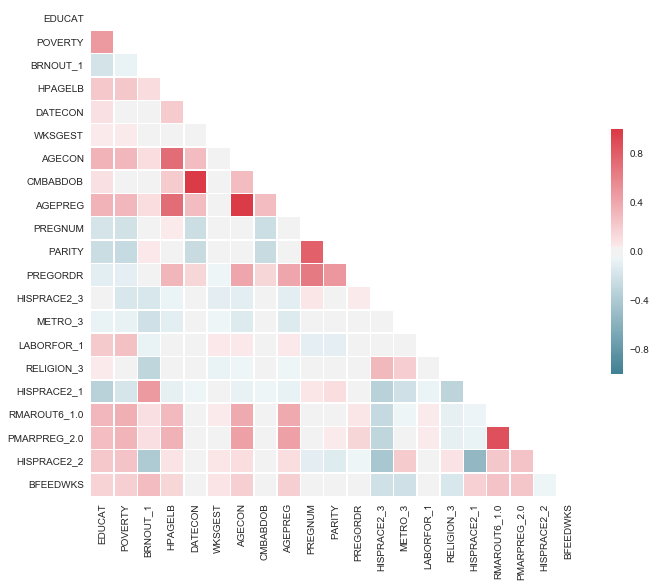

In [81]:
# Compute the correlation matrix
corr = myfile_reduced.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})